In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline
df_text = pd.read_csv ("/home/niddal/Desktop/PhD_projects/Twitter_analysis/Datasets/MHC_Datasets/Final_ones/Emoji8.csv")
df_text.head(2)

,tweet,label
0,😫😫♥️♥️,0
1,🔹,0


In [2]:
ham_df= df_text[df_text['label'] == 0]
spam_df= df_text[df_text['label'] == 1]

In [3]:
ham_df.shape

(610, 2)

In [4]:
spam_df.shape

(362, 2)

In [5]:
from sklearn.utils import shuffle

df_text = shuffle(df_text)

In [6]:
df_text_New = df_text[pd.notnull(df_text['tweet'])]

In [7]:
df_text_New['tweet'].apply(lambda x: len(x.split(' '))).sum()

972

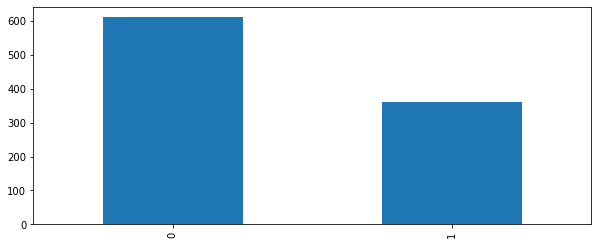

In [8]:
my_tags = ['non_spam','spam']
plt.figure(figsize=(10,4))
df_text_New.label.value_counts().plot(kind='bar');

In [9]:
def print_plot(index):
    example = df_text_New[df_text_New.index == index][['label', 'tweet']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tweet:', example[1])

In [10]:
print_plot(1)

0
Tweet: 🔹


In [11]:
df_text_New['tweet'].apply(lambda x: len(x.split(' '))).sum()

972

In [12]:
df_text_New

,tweet,label
392,😂,0
343,😂😭❤️,0
673,🏅🏅⭕⭕⭕⭕��,1
57,🇸🇦🇸🇦🇸🇦,0
203,❤️❤️,0
...,...,...
365,😂,0
252,💔,0
382,🔉🔉🔉🔉,0
446,💔😞,0


In [13]:
X = df_text_New.tweet
y = df_text_New.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [14]:
X_test.shape

(292,)

# Random Forest

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = Pipeline([('vect', CountVectorizer(token_pattern=r'[^\s]+')),
                ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
               ])
rf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(token_pattern='[^\\s]+')),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [16]:
%%time

y_pred = rf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9726027397260274
              precision    recall  f1-score   support

    non_spam       0.96      0.99      0.98       173
        spam       0.99      0.94      0.97       119

    accuracy                           0.97       292
   macro avg       0.98      0.97      0.97       292
weighted avg       0.97      0.97      0.97       292

CPU times: user 26.6 ms, sys: 0 ns, total: 26.6 ms
Wall time: 23.9 ms


In [20]:
import joblib
joblib.dump(rf, "Emoji_model.pkl")

['Emoji_model.pkl']

In [21]:
classifer = joblib.load("Emoji_model.pkl")

In [28]:
new_observation = ['����']

In [29]:
classifer.predict(new_observation)

array([1])